In [64]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

from wordcloud import WordCloud 
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10 
page_size = 100

df = pd.DataFrame()

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 1100 total reviews
Scraping page 2
   ---> 1200 total reviews
Scraping page 3
   ---> 1300 total reviews
Scraping page 4
   ---> 1400 total reviews
Scraping page 5
   ---> 1500 total reviews
Scraping page 6
   ---> 1600 total reviews
Scraping page 7
   ---> 1700 total reviews
Scraping page 8
   ---> 1800 total reviews
Scraping page 9
   ---> 1900 total reviews
Scraping page 10
   ---> 2000 total reviews


In [52]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Probably the worst business ...
1,"✅ Trip Verified | Definitely not recommended, ..."
2,✅ Trip Verified | BA shuttle service across t...
3,✅ Trip Verified | I must admit like many other...
4,Not Verified | When will BA update their Busi...


### Data Cleaning

In [55]:
df.reviews= df.reviews.str.split('|',expand=True)[1]

In [56]:
df.head()

,reviews
0,Probably the worst business class experience ...
1,"Definitely not recommended, especially for bu..."
2,BA shuttle service across the UK is still su...
3,I must admit like many others I tend to avoid...
4,When will BA update their Business class cab...


In [57]:
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /Users/yangning/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yangning/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/yangning/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [58]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/yangning/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/yangning/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,reviews,POS tagged
0,Probably the worst business class experience ...,"[(Probably, r), (worst, a), (business, n), (cl..."
1,"Definitely not recommended, especially for bu...","[(Definitely, r), (recommended, v), (,, None),..."
2,BA shuttle service across the UK is still su...,"[(BA, n), (shuttle, a), (service, n), (across,..."
3,I must admit like many others I tend to avoid...,"[(must, None), (admit, v), (like, None), (many..."
4,When will BA update their Business class cab...,"[(BA, v), (update, v), (Business, n), (class, ..."


In [59]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,POS tagged,Lemma
0,Probably the worst business class experience ...,"[(Probably, r), (worst, a), (business, n), (cl...",Probably bad business class experience 've e...
1,"Definitely not recommended, especially for bu...","[(Definitely, r), (recommended, v), (,, None),...","Definitely recommend , especially business c..."
2,BA shuttle service across the UK is still su...,"[(BA, n), (shuttle, a), (service, n), (across,...",BA shuttle service across UK still surprisin...
3,I must admit like many others I tend to avoid...,"[(must, None), (admit, v), (like, None), (many...",must admit like many others tend avoid BA lo...
4,When will BA update their Business class cab...,"[(BA, v), (update, v), (Business, n), (class, ...",BA update Business class cabin - 8 across 77...


In [60]:
df[['reviews','Lemma']]

,reviews,Lemma
0,Probably the worst business class experience ...,Probably bad business class experience 've e...
1,"Definitely not recommended, especially for bu...","Definitely recommend , especially business c..."
2,BA shuttle service across the UK is still su...,BA shuttle service across UK still surprisin...
3,I must admit like many others I tend to avoid...,must admit like many others tend avoid BA lo...
4,When will BA update their Business class cab...,BA update Business class cabin - 8 across 77...
...,...,...
995,Flew British Airways from Budapest to London ...,Flew British Airways Budapest London Heathro...
996,The air conditioning didn’t work in the part ...,air condition ’ work part airplane sit hot ....
997,My bag was damaged on a BA flight in Decembe...,bag damage BA flight December 2017 . look go...
998,Efficient check in helpful staff advised on b...,Efficient check helpful staff advise best lo...


### Word Cloud

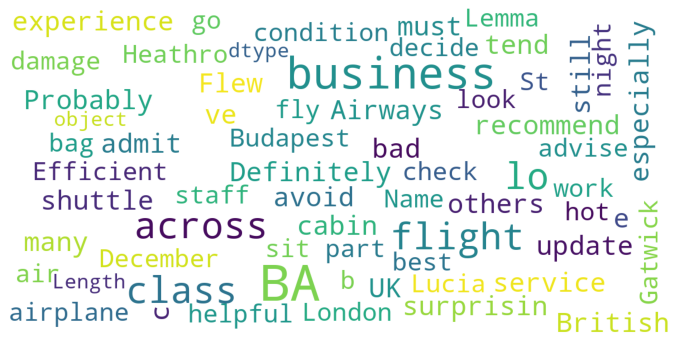

In [61]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)

### Sentiment Analysis


In [62]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,POS tagged,Lemma,Sentiment,Analysis
0,Probably the worst business class experience ...,"[(Probably, r), (worst, a), (business, n), (cl...",Probably bad business class experience 've e...,-0.9853,Negative
1,"Definitely not recommended, especially for bu...","[(Definitely, r), (recommended, v), (,, None),...","Definitely recommend , especially business c...",0.8519,Positive
2,BA shuttle service across the UK is still su...,"[(BA, n), (shuttle, a), (service, n), (across,...",BA shuttle service across UK still surprisin...,0.9501,Positive
3,I must admit like many others I tend to avoid...,"[(must, None), (admit, v), (like, None), (many...",must admit like many others tend avoid BA lo...,0.8858,Positive
4,When will BA update their Business class cab...,"[(BA, v), (update, v), (Business, n), (class, ...",BA update Business class cabin - 8 across 77...,0.8188,Positive


([<matplotlib.patches.Wedge at 0x7ff52c8aaa30>,
 [Text(-0.08285944828829274, 1.096874793141569, 'Positive'),
  Text(-0.3201398221353421, -1.052383244965042, 'Negative'),
  Text(1.2582960007196198, -0.4890717478785816, 'Neutral')],
 [Text(-0.045196062702705125, 0.598295341713583, '52.4%'),
  Text(-0.174621721164732, -0.5740272245263865, '35.8%'),
  Text(0.7922604448975383, -0.30793406347910696, '11.8%')])

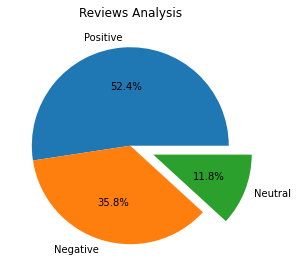

In [63]:
vader_counts = df['Analysis'].value_counts()

%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)